<a href="https://colab.research.google.com/github/leureva/mbd-data-mining/blob/main/Activity5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [61]:
path = "https://raw.githubusercontent.com/leureva/mbd-data-mining/main/Activity5_antropometria-dataset-1.csv"

In [62]:
df = pd.read_csv(path)
df

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,300116,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,...,18:00,1,18:05,1,R3002,5,3,1,7615.607749,305
18636,40253,1,4,CAMPECHE,2,75,0,69.40,1,144.80,...,18:40,1,18:40,1,M0408,5,3,1,195.314670,45
18637,301099,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,86,7,46.75,2,149.20,...,8:00,3,23:00,1,M3024,2,1,2,1758.912979,302
18638,250801,1,25,SINALOA,2,72,7,59.05,2,142.50,...,6:02,3,6:02,1,M2512,3,2,1,2354.581350,253


In [63]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [64]:
df.rename(columns={"peso":"Weight",
                   "cintura":"Waist"
                   },
          inplace=True
          )

In [65]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses',
       'Weight', 'ropa', 'talla', 'emb', 'temb', 'Waist', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [66]:
df.drop (["intp","emb","temb","PrimaryLast","code_upm","est_urb","est_marg"], 
        axis=1, 
        inplace=True
       )

In [67]:
df.head()

,folio,entidad,desc_ent,sexo,edad,meses,Weight,ropa,talla,Waist,cadera,sistol,diastol,hpresion,tbrazo,htension,est_dis,pondef,est_var
0,210295,21,PUEBLA,2,38,8,73.70,2,146.4,98.7,106.0,63.25,53.25,16:30,2,16:35,5,3470.002176,215
1,101655,10,DURANGO,2,11,11,35.65,2,145.1,64.0,75.0,70.00,50.00,15:25,3,15:25,1,417.946672,101
2,10287,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,67.6,94.3,70.50,41.00,9:40,1,9:40,5,472.980811,15
3,91526,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,60.6,72.2,71.00,64.00,7:40,3,7:45,4,1832.581391,94
4,210939,21,PUEBLA,2,19,3,97.95,2,161.0,113.0,127.0,72.00,53.50,6:00,2,6:00,5,7622.066564,215


In [68]:
df_waist = df[["Waist"]]
df_waist

,Waist
0,98.70
1,64.00
2,67.60
3,60.60
4,113.00
...,...
18635,93.00
18636,103.05
18637,71.35
18638,99.95


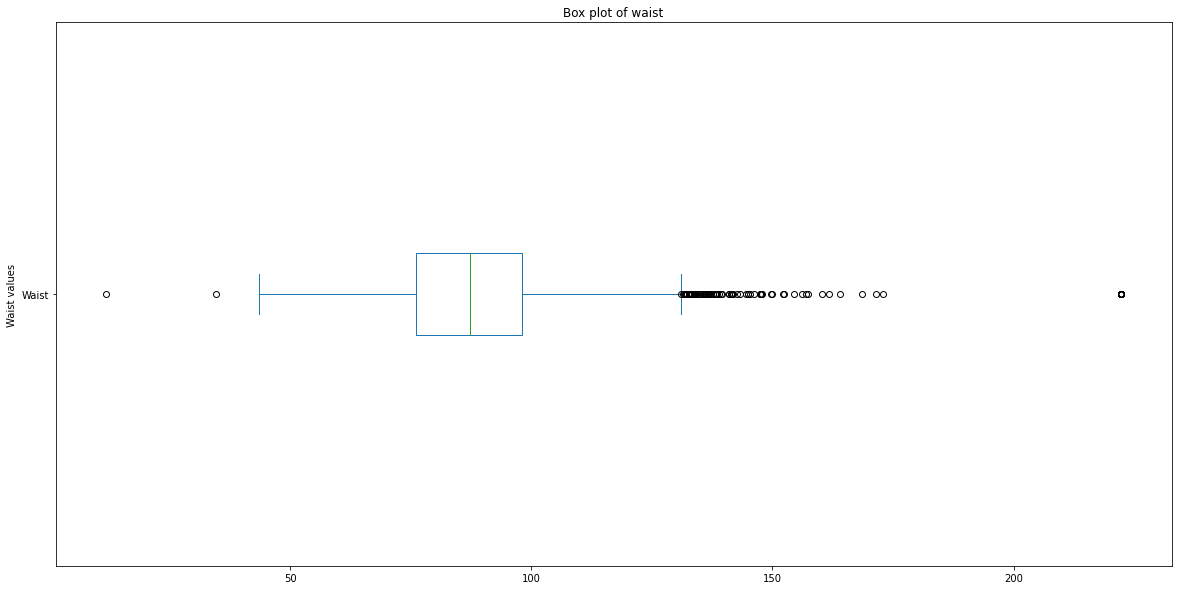

In [69]:
df_waist.plot(kind='box', 
              figsize=(20, 10),
              vert=False, 
             )

plt.title('Box plot of waist')
plt.ylabel('Waist values')

plt.show()

In [70]:
df_waist.describe()

,Waist
count,18032.000000
mean,87.778529
std,16.950062
min,11.900000
25%,76.000000
50%,87.250000
75%,98.000000
max,222.220000


In [71]:
df_weight = df[["Weight"]]
df_weight

,Weight
0,73.70
1,35.65
2,54.80
3,33.40
4,97.95
...,...
18635,75.80
18636,69.40
18637,46.75
18638,59.05


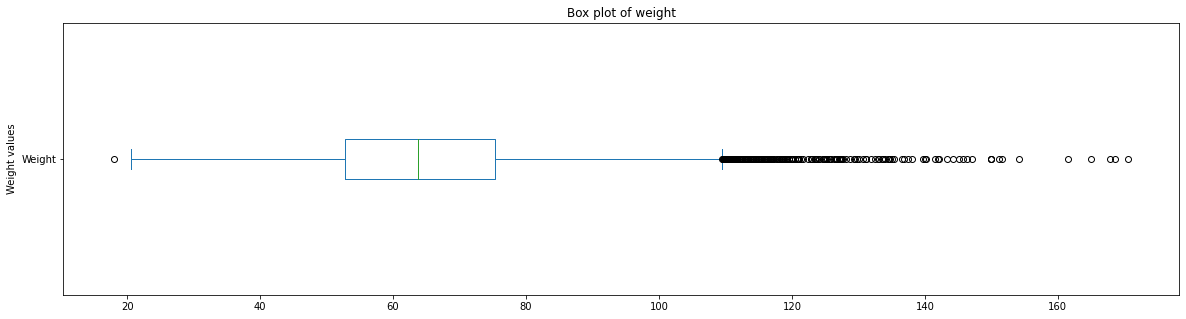

In [72]:
df_weight.plot(kind='box', 
              figsize=(20, 5),
               vert=False, 
             )

plt.title('Box plot of weight')
plt.ylabel('Weight values')

plt.show()

In [73]:
df_weight.describe()

,Weight
count,18640.000000
mean,64.638707
std,17.660325
min,18.000000
25%,52.700000
50%,63.700000
75%,75.400000
max,170.600000


In [74]:
df_WW= df[["Weight","Waist"]]
df_WW

,Weight,Waist
0,73.70,98.70
1,35.65,64.00
2,54.80,67.60
3,33.40,60.60
4,97.95,113.00
...,...,...
18635,75.80,93.00
18636,69.40,103.05
18637,46.75,71.35
18638,59.05,99.95


In [75]:
df_WW.describe()

,Weight,Waist
count,18640.000000,18032.000000
mean,64.638707,87.778529
std,17.660325,16.950062
min,18.000000,11.900000
25%,52.700000,76.000000
50%,63.700000,87.250000
75%,75.400000,98.000000
max,170.600000,222.220000


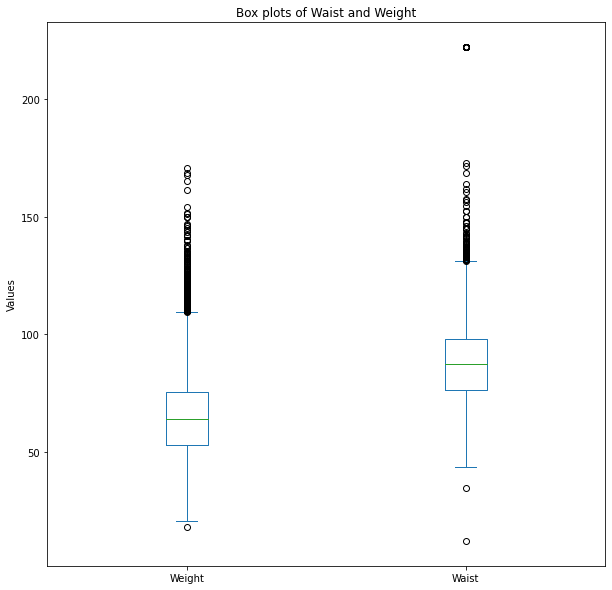

In [76]:
df_WW.plot(kind='box', figsize=(10, 10))

plt.title('Box plots of Waist and Weight')
plt.ylabel('Values')

plt.show()

In [77]:
df_talla= df[["talla"]]
df_talla

,talla
0,146.40
1,145.10
2,162.00
3,146.50
4,161.00
...,...
18635,141.15
18636,144.80
18637,149.20
18638,142.50


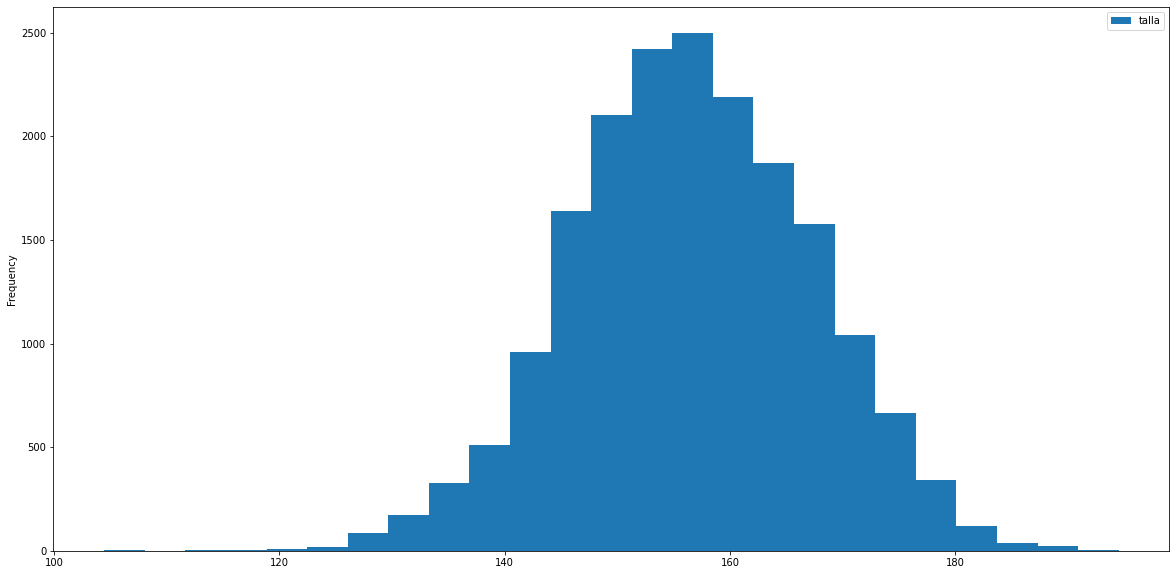

In [78]:
hist_plot = df_talla.plot(kind='hist',
                          figsize=(20, 10),
                          bins = 25)

In [79]:
df.head()

,folio,entidad,desc_ent,sexo,edad,meses,Weight,ropa,talla,Waist,cadera,sistol,diastol,hpresion,tbrazo,htension,est_dis,pondef,est_var
0,210295,21,PUEBLA,2,38,8,73.70,2,146.4,98.7,106.0,63.25,53.25,16:30,2,16:35,5,3470.002176,215
1,101655,10,DURANGO,2,11,11,35.65,2,145.1,64.0,75.0,70.00,50.00,15:25,3,15:25,1,417.946672,101
2,10287,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,67.6,94.3,70.50,41.00,9:40,1,9:40,5,472.980811,15
3,91526,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,60.6,72.2,71.00,64.00,7:40,3,7:45,4,1832.581391,94
4,210939,21,PUEBLA,2,19,3,97.95,2,161.0,113.0,127.0,72.00,53.50,6:00,2,6:00,5,7622.066564,215


In [95]:
ndf = df.pivot_table("Weight", 
               index="desc_ent", 
               columns="sexo",
               aggfunc = 'mean',
               )
ndf.head()

sexo,1,2
desc_ent,,
AGUASCALIENTES,69.985381,63.254292
BAJA CALIFORNIA,71.391818,65.893667
BAJA CALIFORNIA SUR,75.561015,68.168959
CAMPECHE,68.622637,62.920493
CHIAPAS,58.365222,57.096111


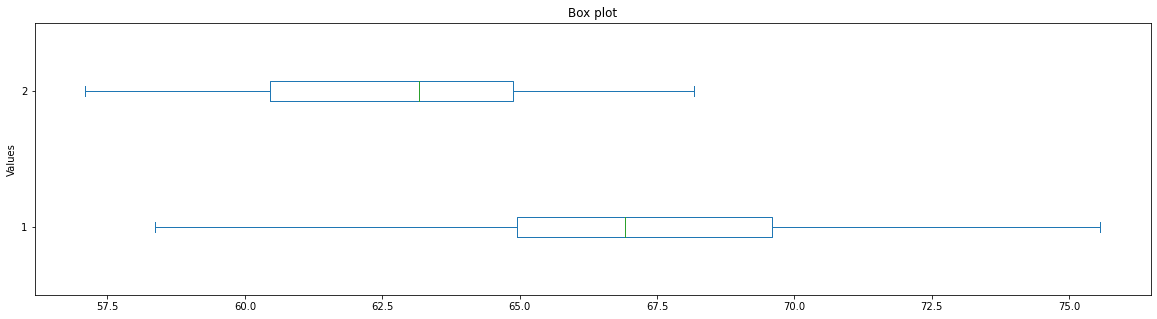

In [96]:
ndf.plot(kind='box', 
              figsize=(20, 5),
               vert=False, 
             )

plt.title('Box plot')
plt.ylabel('Values')

plt.show()

In [97]:
ndf.describe()

sexo,1,2
count,32.000000,32.000000
mean,67.003873,62.811854
std,3.820925,3.102526
min,58.365222,57.096111
25%,64.952109,60.453427
50%,66.913858,63.177643
75%,69.591841,64.872779
max,75.561015,68.168959


In [99]:
zdf = df.pivot_table("cadera", 
               index="desc_ent", 
               columns="sexo",
               aggfunc = 'mean',
               )
zdf.head()

sexo,1,2
desc_ent,,
AGUASCALIENTES,95.384768,99.632282
BAJA CALIFORNIA,98.499394,101.438643
BAJA CALIFORNIA SUR,99.918812,102.727888
CAMPECHE,96.502321,100.843431
CHIAPAS,89.872177,95.798701


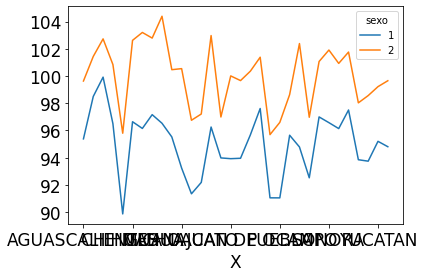

In [100]:
line_plot = zdf.plot(kind='line')

plt.xlabel("X",fontsize=17)

plt.yticks(fontsize=17)
plt.xticks(fontsize=17)


plt.show()

In [101]:
xdf = df.pivot_table("sistol", 
               index="desc_ent", 
               columns="sexo",
               aggfunc = 'sum',
               )
xdf.head()

sexo,1,2
desc_ent,,
AGUASCALIENTES,37608.0,42565.25
BAJA CALIFORNIA,32240.0,35515.50
BAJA CALIFORNIA SUR,32076.0,31207.00
CAMPECHE,28854.5,35136.25
CHIAPAS,28550.0,40385.50


In [106]:
xdf.plot.bar(x='sistol', y='desc_ent', rot=0)

KeyError: ignored